<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/NFLGameDrives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the library for NFL Data
!pip install nfl_data_py
import nfl_data_py as nfl

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=5f2d76576c82533255ae873018dddd4ea3782e9526ef0cf94510c78a3bbf7491
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py
Mounted at /content/drive


In [3]:
gm = nfl.import_pbp_data([2023])
pd.set_option('display.max_columns', None)
gm = gm[gm["game_id"] == "2023_03_LAC_MIN"]

gm.head(30)

2023 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [4]:
lac_min = gm[["posteam","play_type", "drive", "qtr", "time", "yardline_100", "ydsnet", "drive_end_transition"]]

# lac_min = lac_min[(lac_min["play_type"] == "pass") | (lac_min["play_type"] == "run") | (lac_min["play_type"] == "no_play")]
lac_min = lac_min[lac_min['play_type'] != "kickoff"]
lac_min = lac_min[lac_min['play_type'] != "extra_point"]

lac_min = lac_min.sort_values(by = ["qtr","time"], ascending = [True, False]).reset_index(drop = True)

drive_start = lac_min.groupby('drive').first().reset_index()
drive_end = lac_min.groupby('drive').last().reset_index()

drive = pd.merge(drive_start, drive_end, on=['drive'])

drive = drive.rename(columns={'qtr_x': 'qtr',
  'posteam_x': 'posteam',
  'yardline_100_y': 'yardline_end',
  'yardline_100_x': 'yardline_start',
  'drive_end_transition_x': 'drive_result'})

drive_final = drive[["drive", "posteam", "qtr", "yardline_start", "yardline_end", "drive_result"]]

drive_final.loc[drive_final['drive_result'] == "TOUCHDOWN", ['yardline_end']] = 0

qtr_drive = drive_final.groupby('qtr').last().reset_index()

drive_final.head(24)

,drive,posteam,qtr,yardline_start,yardline_end,drive_result
0,1.0,LAC,1.0,75.0,70.0,PUNT
1,2.0,MIN,1.0,57.0,26.0,FUMBLE
2,3.0,LAC,1.0,79.0,0.0,TOUCHDOWN
3,4.0,MIN,1.0,75.0,53.0,PUNT
4,5.0,LAC,2.0,80.0,58.0,PUNT
5,6.0,MIN,2.0,75.0,0.0,TOUCHDOWN
6,7.0,LAC,2.0,75.0,61.0,FUMBLE
7,8.0,MIN,2.0,45.0,5.0,FIELD_GOAL
8,9.0,LAC,2.0,75.0,0.0,TOUCHDOWN
9,10.0,MIN,2.0,75.0,51.0,END_HALF


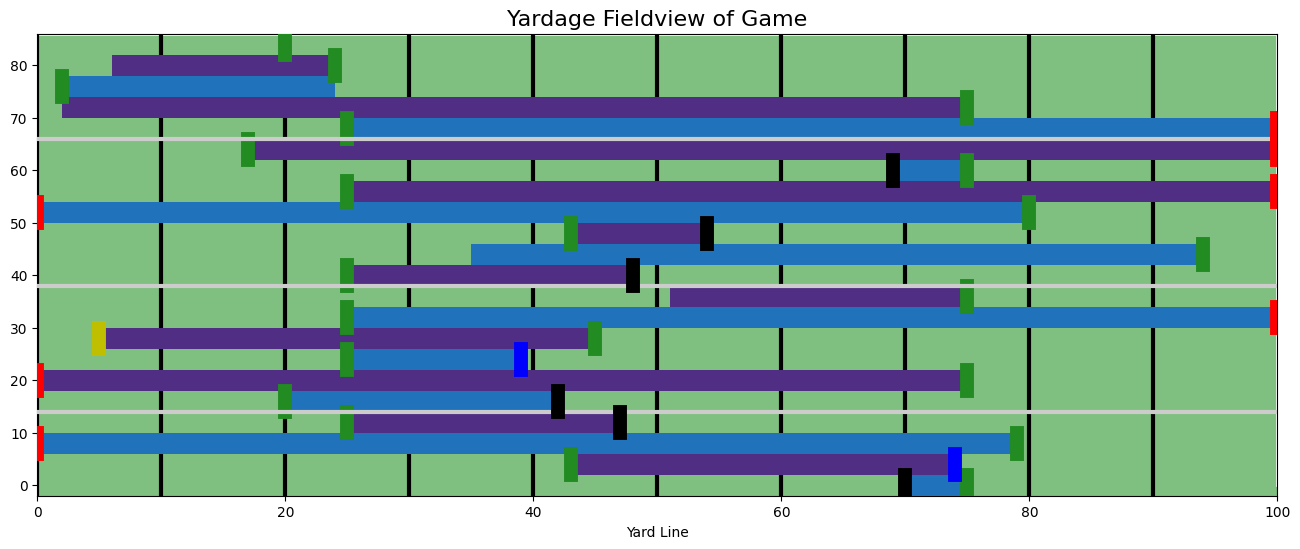

In [17]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in drive_final["posteam"]]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 6))

field_width = (len(drive_final["drive"])) * 4 - 2
field_length = 100

# Set the background color to green
ax.set_facecolor('green')
ax.patch.set_alpha(0.5)

# Plot the field
plt.plot([0, 0, field_length, field_length], [0, field_width, field_width, 0], color='white', lw=2)
plt.xlim(0, field_length)
plt.ylim(-2, field_width)

# Creates Bars
for i in range(len(drive_final["drive"])):
  if drive_final["qtr"][i] % 2 != 0:

    if (drive_final["posteam"][i] == "LAC"):
      plt.barh(4*i, drive_final["yardline_end"][i]  -  drive_final["yardline_start"][i], left=drive_final["yardline_start"][i], height=4, color=tm_colors[i], zorder = 10)

    if (drive_final["posteam"][i] == "MIN"):
      plt.barh(4*i, drive_final["yardline_start"][i] -  drive_final["yardline_end"][i], left=(100-drive_final["yardline_start"][i]), height=4, color=tm_colors[i], zorder = 10)

  if drive_final["qtr"][i] % 2 == 0:

    if (drive_final["posteam"][i] == "LAC"):
      plt.barh(4*i, drive_final["yardline_start"][i] -  drive_final["yardline_end"][i], left=(100-drive_final["yardline_start"][i]), height=4, color=tm_colors[i], zorder = 10)

    if (drive_final["posteam"][i] == "MIN"):
      plt.barh(4*i, drive_final["yardline_end"][i] -  drive_final["yardline_start"][i], left=drive_final["yardline_start"][i], height=4, color=tm_colors[i], zorder = 10)

# Start Lines
for i in range(len(drive_final["drive"])):
    min = i / 22
    max = (i + 1) / 22

    if drive_final["qtr"][i] % 2 != 0:
        if (drive_final["posteam"][i] == "LAC"):
            plt.axvline(drive_final["yardline_start"][i], ymin= min, ymax= max, color="#228B22", linestyle='-', lw=10, zorder=15)

        if (drive_final["posteam"][i] == "MIN"):
          plt.axvline(100-drive_final["yardline_start"][i], ymin= min, ymax= max, color="#228B22", linestyle='-', lw=10, zorder=15)

    if drive_final["qtr"][i] % 2 == 0:

        if (drive_final["posteam"][i] == "LAC"):
          plt.axvline(100-drive_final["yardline_start"][i], ymin=min, ymax=max, color="#228B22", linestyle='-', lw=10, zorder=15)

        if (drive_final["posteam"][i] == "MIN"):
            plt.axvline(drive_final["yardline_start"][i], ymin=min, ymax=max, color="#228B22", linestyle='-', lw=10, zorder=15)

# Scoring
for i in range(len(drive_final["drive"])):
    min = i / 22
    max = (i + 1) / 22

    if (drive_final["drive_result"][i] == "TOUCHDOWN"):
      if drive_final["qtr"][i] % 2 != 0:
          if (drive_final["posteam"][i] == "LAC"):
              plt.axvline(0, ymin= min, ymax= max, color="red", linestyle='-', lw=10, zorder=25)

          if (drive_final["posteam"][i] == "MIN"):
            plt.axvline(100, ymin= min, ymax= max, color="red", linestyle='-', lw=10, zorder=25)

      if drive_final["qtr"][i] % 2 == 0:

          if (drive_final["posteam"][i] == "LAC"):
            plt.axvline(100, ymin= min, ymax= max, color="red", linestyle='-', lw=10, zorder=25)

          if (drive_final["posteam"][i] == "MIN"):
              plt.axvline(0, ymin= min, ymax= max, color="red", linestyle='-', lw=10, zorder=25)

    if (drive_final["drive_result"][i] == "FIELD_GOAL"):
        if drive_final["qtr"][i] % 2 != 0:
          if (drive_final["posteam"][i] == "LAC"):
              plt.axvline(drive_final["yardline_end"][i], ymin= min, ymax= max, color="y", linestyle='-', lw=10, zorder=25)

          if (drive_final["posteam"][i] == "MIN"):
            plt.axvline(100 - drive_final["yardline_end"][i], ymin= min, ymax= max, color="y", linestyle='-', lw=10, zorder=25)

        if drive_final["qtr"][i] % 2 == 0:

          if (drive_final["posteam"][i] == "LAC"):
            plt.axvline(100 - drive_final["yardline_end"][i], ymin= min, ymax= max, color="y", linestyle='-', lw=10, zorder=25)

          if (drive_final["posteam"][i] == "MIN"):
              plt.axvline(drive_final["yardline_end"][i], ymin= min, ymax= max, color="y", linestyle='-', lw=10, zorder=25)

    if (drive_final["drive_result"][i] == "PUNT"):
        if drive_final["qtr"][i] % 2 != 0:
          if (drive_final["posteam"][i] == "LAC"):
              plt.axvline(drive_final["yardline_end"][i], ymin= min, ymax= max, color="k", linestyle='-', lw=10, zorder=25)

          if (drive_final["posteam"][i] == "MIN"):
            plt.axvline(100 - drive_final["yardline_end"][i], ymin= min, ymax= max, color="k", linestyle='-', lw=10, zorder=25)

        if drive_final["qtr"][i] % 2 == 0:

          if (drive_final["posteam"][i] == "LAC"):
            plt.axvline(100 - drive_final["yardline_end"][i], ymin= min, ymax= max, color="k", linestyle='-', lw=10, zorder=25)

          if (drive_final["posteam"][i] == "MIN"):
              plt.axvline(drive_final["yardline_end"][i], ymin= min, ymax= max, color="k", linestyle='-', lw=10, zorder=25)

    if ((drive_final["drive_result"][i] == "INTERCPETION") | (drive_final["drive_result"][i] == "FUMBLE")):
        if drive_final["qtr"][i] % 2 != 0:
          if (drive_final["posteam"][i] == "LAC"):
              plt.axvline(drive_final["yardline_end"][i], ymin= min, ymax= max, color="b", linestyle='-', lw=10, zorder=25)

          if (drive_final["posteam"][i] == "MIN"):
            plt.axvline(100 - drive_final["yardline_end"][i], ymin= min, ymax= max, color="b", linestyle='-', lw=10, zorder=25)

        if drive_final["qtr"][i] % 2 == 0:

          if (drive_final["posteam"][i] == "LAC"):
            plt.axvline(100 - drive_final["yardline_end"][i], ymin= min, ymax= max, color="b", linestyle='-', lw=10, zorder=25)

          if (drive_final["posteam"][i] == "MIN"):
              plt.axvline(drive_final["yardline_end"][i], ymin= min, ymax= max, color="b", linestyle='-', lw=10, zorder=25)



# Split quarters
for i in range(len(qtr_drive["qtr"])-1):
  plt.axhline(qtr_drive["drive"][i]* 4-2, color='0.8', linewidth = 3, zorder = 15)

# Yard lines
for i in range(10):
  line =10 * i
  plt.axvline(line, color='k', linewidth = 3, zorder = 9)

# Title
ax.set_title('Yardage Fieldview of Game', fontsize=16)

# Add labels
plt.xlabel("Yard Line")

# plt.xticks([])
# plt.yticks([])
# Display the field
plt.show()